In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm.notebook import tqdm

C:\Users\DELL\.conda\envs\helmet-detection-wobot\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading the trained model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = './yolov5/runs/train/exp/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2022-11-14 Python-3.10.6 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Getting the closest clour from bounding box

In [4]:
def unique_count_app(a):
    '''
    a: NumPy array i.e. the ROI from your image
    Returns: tuple (r, g, b)
    '''
    colors, count = np.unique(
        a.reshape(-1, a.shape[-1]), axis=0, return_counts=True)
    return colors[count.argmax()]



def closest(color):
    '''
    Parameter:
    colour: tuple (r, g, b)
    Returns:
    a list, which has [r, g, b] value for closest color from the passed `color` and name of colour
    '''
    color_map = {0: "blue",
                 1: "yellow",
                 2: "orange",
                 3: "white"}
    
    colors = np.array([[0, 128, 255], 
                       [232, 215, 0], 
                       [255, 145, 0], 
                       [255, 255, 255]])
    color = np.array(color)
    distances = np.sqrt(np.sum((colors-color)**2, axis=1))
    index_of_smallest = np.where(distances == np.amin(distances))
    idx = index_of_smallest[0][0]
    return colors[idx], color_map[idx]

# Getting the bounding box area

In [5]:
def bounding_box_img(img,bbox):
    x_min, y_min, x_max, y_max = bbox 
    
    y_max = y_max - (y_max - y_min) // 2
    bbox_obj = img[y_min:y_max, x_min:x_max]
    return bbox_obj

## Testing the image on a test sample

In [55]:
import os
image_path = os.path.join('.\data\HardHat_Test_Images\Images', 'hard_hat_workers34.png')

image 1/1: 415x416 8 helmets
Speed: 89.1ms pre-process, 162.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


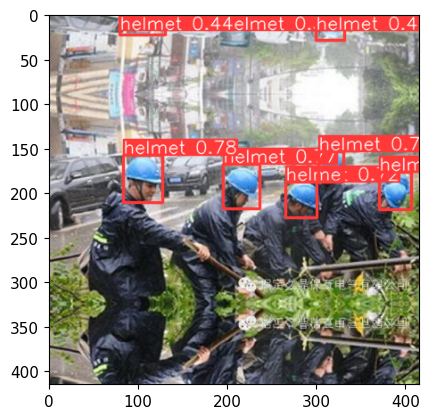

In [56]:
%matplotlib inline

results = model(image_path)
results.print()

img = np.squeeze(results.render())
plt.imshow(img)


In [57]:
bbox = np.array(np.int64(results.xyxy[0][0]))
print(bbox)

[302 154 330 188   0   0]


# Get the ROI on predicted image

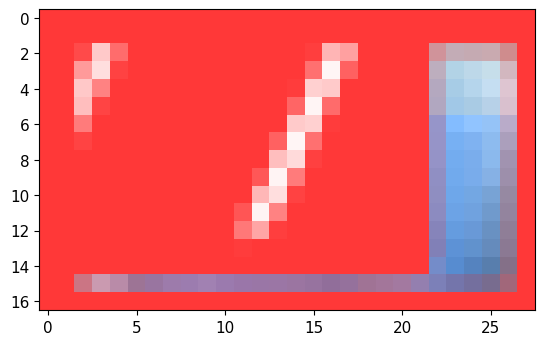

In [58]:
cropped_img = bounding_box_img(img,bbox[:4])
plt.imshow(cropped_img)

In [59]:
# get the ROI on normal image to get the colour of helmet

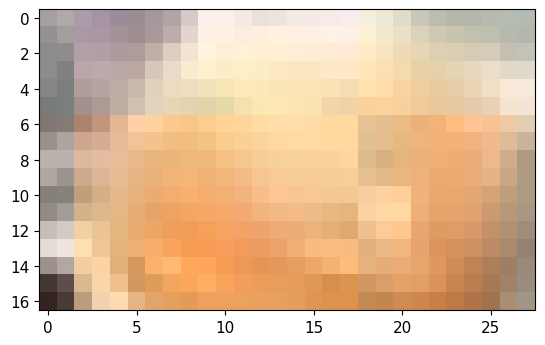

In [60]:
img = cv2.imread(image_path)

cropped_img = bounding_box_img(img,bbox[:4])
plt.imshow(cropped_img)

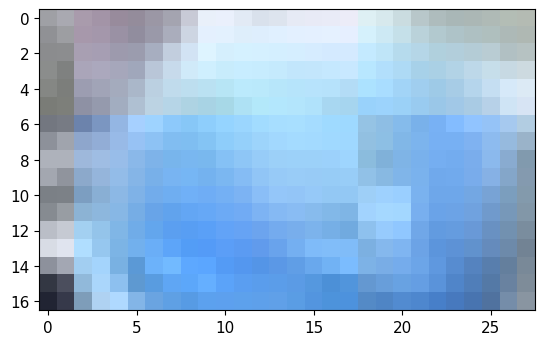

In [61]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = bounding_box_img(img_rgb,bbox[:4])
plt.imshow(cropped_img)

In [62]:
color_tuple = unique_count_app(cropped_img)
print(color_tuple)
color = closest(color_tuple)[0]
print(type(color[0]))

[108 163 230]
<class 'numpy.int32'>


In [63]:
color_tuple = unique_count_app(cropped_img)
print(color_tuple)
color_tuple = closest(color_tuple)[0]#.tolist()
# color[0] = int(color[0])
# color[1] = int(color[1])
# color[2] = int(color[2])
# color_ttttt = tuple([int(x) for x in color_tuple])
print(color_tuple)
color_tuple = np.absolute(255 - color_tuple).tolist()

[108 163 230]
[  0 128 255]


# Drawing rectangle on image

In [64]:
"""
    just for this case
"""
confidence_score = np.array(results.xyxy[0][0])
print(confidence_score)

[     302.03      154.57      330.71      188.82     0.78422           0]


In [66]:
img_rect_drawn = cv2.imread(image_path)

x_min, y_min, x_max, y_max = bbox[:4]
colooo = (0,255- 145,255)
# cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)
cv2.rectangle(img_rect_drawn, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color_tuple, 2)

cv2.putText(img_rect_drawn, str(round(float(confidence_score[4]),2)),(int(x_min), int(y_min)) , cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_tuple, 1, cv2.LINE_AA)

cv2.imshow("im", img_rect_drawn)
cv2.waitKey()
cv2.destroyAllWindows()
bbox[4]

0

# Here we map every detection after this markdown

# Drawing bounding box for every detection

image 1/1: 416x416 1 helmet
Speed: 10.0ms pre-process, 162.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


tensor([[124.40749,  91.88593, 245.07430, 207.54951,   0.63113,   0.00000]])

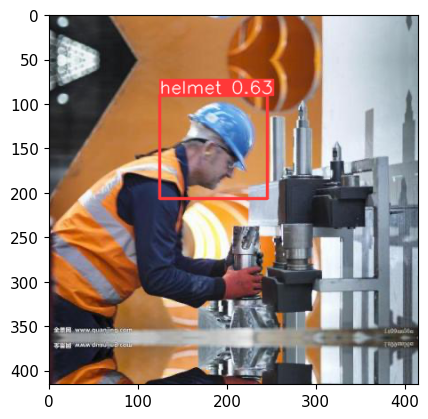

In [95]:
image_path = os.path.join('.\data\HardHat_Test_Images\Images', 'hard_hat_workers223.png')
%matplotlib inline

results = model(image_path)
results.print()

img = np.squeeze(results.render())
plt.imshow(img)

l = results.xyxy[0]
every_looped_bb_img = cv2.imread(image_path)
l

In [97]:
img_rect_drawn = cv2.imread(image_path)

x_min, y_min, x_max, y_max = bbox[:4]
# colooo = (0,255- 145,255)
# cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)
color_tuple = unique_count_app(cropped_img).tolist()
cv2.rectangle(img_rect_drawn, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color_tuple, 2)

cv2.putText(img_rect_drawn, str(round(float(confidence_score[4]),2)),(int(x_min), int(y_min)) , cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_tuple, 1, cv2.LINE_AA)

cv2.imshow("im", img_rect_drawn)
cv2.waitKey()
cv2.destroyAllWindows()
bbox[4]

0

In [96]:
# results = model(every_looped_bb_img)
# print(results)

results.pred



[tensor([[124.40749,  91.88593, 245.07430, 207.54951,   0.63113,   0.00000]])]

In [101]:
"""
    Predictions are stored in a list
"""
img_rect_drawn = cv2.imread(image_path)
bounding_box_result = results.pred[0]
print("--------------")
# print(bounding_box_img)

"""
    Looping through the list in order to
    parse through every detection made by 
    the model and draw rectagle accordingly
"""

# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
  
# fontScale
fontScale = 0.5
   
# Blue color in BGR
color = colooo
  
# Line thickness of 2 px
thickness = 1

for coordinates in bounding_box_result:
    print(coordinates[:4])
    x_min, y_min, x_max, y_max = coordinates[:4]
    
    """
        for confidence score
    """
    text = str(round(float(coordinates[4]),2))
    org = (int(x_min), int(y_min))
    color_tuple = unique_count_app(cropped_img)
    color_tuple = np.flip(color_tuple).tolist()
#     print(color_tuple)
#     color_tuple = closest(color_tuple)[0]#.tolist()
#     color_tuple = np.absolute(255 - color_tuple).tolist()
    # cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)
    cv2.rectangle(img_rect_drawn, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color_tuple, 1)
    cv2.putText(img_rect_drawn, text, org, font, fontScale, color_tuple, thickness, cv2.LINE_AA)

cv2.imshow("im", img_rect_drawn)
cv2.waitKey()
cv2.destroyAllWindows()

--------------
tensor([124.40749,  91.88593, 245.07430, 207.54951])


In [103]:
for coordinates in bounding_box_result:
    print(coordinates[:4])
    x_min, y_min, x_max, y_max = coordinates[:4]
    
    """
        for confidence score
    """
    text = str(round(float(coordinates[4]),2))
    org = (int(x_min), int(y_min))
    color_tuple = unique_count_app(cropped_img)
    print(color_tuple)
    color_tuple = closest(color_tuple)#.tolist()
    print(color_tuple)
#     color_tuple = np.absolute(255 - color_tuple[0]).tolist()
#     print(color_tuple)
#     color_tuple = closest(color_tuple)
#     print(color_tuple)
    
    print("-------------------")
    

tensor([124.40749,  91.88593, 245.07430, 207.54951])
[108 163 230]
(array([  0, 128, 255]), 'blue')
-------------------


[173  86  77]


(array([255, 145,   0]), 'orange')